# Introducing the Problem
</br>
What is Spam?
</br>
Spam is any kind of unwanted, unsolicited digital communication that gets sent out in bulk. Often spam is sent via email, but it can also be distributed via text messages, phone calls, or social media.

[Source](https://www.malwarebytes.com/spam)


For my project I am going to be investigating two models to assesse the effectiveness of spam detection methodologies. The first methodology is a commonly used approach known as the Naive Bayes classification method.
</br>

Naive Bayes classifiers are a popular statistical technique of e-mail filtering. They typically use bag-of-words features to identify email spam, an approach commonly used in text classification.

Naive Bayes classifiers work by correlating the use of tokens (typically words, or sometimes other things), with spam and non-spam e-mails and then using Bayes' theorem to calculate a probability that an email is or is not spam.

Naive Bayes spam filtering is a baseline technique for dealing with spam that can tailor itself to the email needs of individual users and give low false positive spam detection rates that are generally acceptable to users. It is one of the oldest ways of doing spam filtering, with roots in the 1990s.

[Source](http://robotics.stanford.edu/users/sahami/papers-dir/spam.pdf)

The second method of spam detection I am going to explore is a more modern method that uses large language models (LLM's). Spam-T5, a Flan-T5 model that has been specifically adapted and fine-tuned for the purpose of detecting email spam is the model i will be using and I will be adapting code from [this](https://github.com/jpmorganchase/llm-email-spam-detection/) repo to introduce the model. Introduced by Chung [et al](https://arxiv.org/abs/2210.11416v5). in Scaling Instruction-Finetuned Language Models. Flan-T5 is the instruction fine-tuned version of T5 or Text-to-Text Transfer Transformer Language Model.

Below I will install the Spam-T5 model

In [1]:
# # Clone the GitHub repository
!git clone https://github.com/jpmorganchase/llm-email-spam-detection.git


fatal: destination path 'llm-email-spam-detection' already exists and is not an empty directory.


In [2]:
# Change the current directory to the cloned repository
%cd llm-email-spam-detection

/content/llm-email-spam-detection


In [ ]:
# Install the required Python packages
!pip install -r requirements.txt --extra-index-url https://download.pytorch.org/whl/cu116


In [4]:
import sys
sys.path.append('src')


In [ ]:
from spamdetection.training import train_baselines, train_llms


In [6]:
from src.spamdetection.preprocessing import init_datasets

In [7]:
init_datasets()

In [ ]:
# Installing the necessary packages to ensure the model trains

!apt-get install texlive-full


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


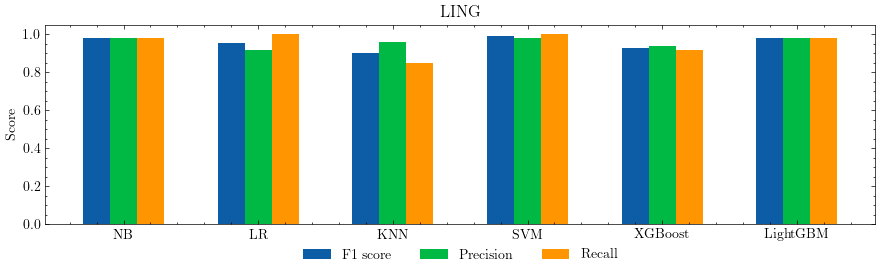

                f1 precision    recall  accuracy training_time inference_time
NB        0.978723  0.978723  0.978723  0.993056      0.005631       0.000658
LR        0.955556  0.914894       1.0  0.986111      0.028627       0.000499
KNN            0.9  0.957447  0.849057  0.965278      0.000955       0.011327
SVM       0.989247  0.978723       1.0  0.996528       1.64173       0.134503
XGBoost   0.926316   0.93617  0.916667  0.975694      6.244818       0.003866
LightGBM  0.978723  0.978723  0.978723  0.993056      1.060066       0.001665


In [23]:
train_baselines(seeds=[0], datasets=["ling"], train_sizes=[0.8], test_set="test")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


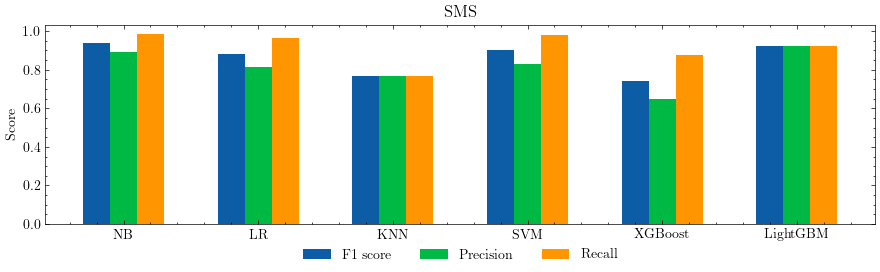

                f1 precision    recall  accuracy training_time inference_time
NB        0.935484  0.892308  0.983051  0.984526      0.009515       0.001664
LR        0.883333  0.815385  0.963636  0.972921      0.048193       0.000611
KNN       0.769231  0.769231  0.769231  0.941973      0.001715       0.024939
SVM            0.9  0.830769  0.981818  0.976789       6.98104       0.516388
XGBoost   0.743363  0.646154     0.875  0.943907      8.261701       0.007092
LightGBM  0.923077  0.923077  0.923077  0.980658      0.175182       0.002888


In [ ]:
train_baselines(seeds=[0], datasets=["sms"], train_sizes=[0.8], test_set="test")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


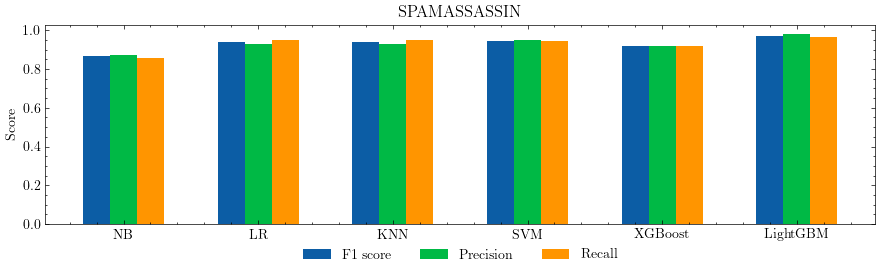

                f1 precision    recall  accuracy training_time inference_time
NB        0.864583  0.873684   0.85567   0.91405      0.010964       0.001233
LR        0.938667  0.926316  0.951351  0.961983      0.051383       0.000632
KNN       0.938667  0.926316  0.951351  0.961983      0.001491       0.024603
SVM       0.944882  0.947368  0.942408  0.965289      8.497545       0.544617
XGBoost   0.918635  0.921053   0.91623   0.94876     11.831112       0.005441
LightGBM  0.971279  0.978947  0.963731  0.981818      2.086351       0.003433


In [ ]:
train_baselines(seeds=[0], datasets=["spamassassin"], train_sizes=[0.8], test_set="test")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


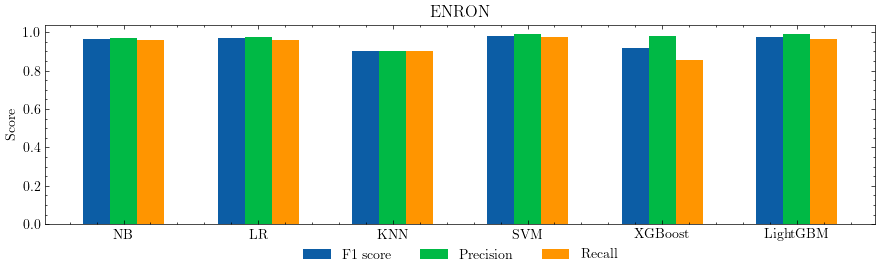

                f1 precision    recall  accuracy training_time inference_time
NB        0.963469  0.967764  0.959211  0.964907      0.045128       0.004119
LR        0.967698  0.975995  0.959541  0.968842       0.44854       0.002572
KNN       0.903734  0.904664  0.902806  0.907839      0.004393       0.298668
SVM        0.98297  0.989712  0.976319  0.983601    151.086755       14.11216
XGBoost   0.915655  0.982853  0.857057  0.913414     58.826908       0.014813
LightGBM  0.977974  0.989712   0.96651  0.978682      5.876527       0.013113


In [ ]:
train_baselines(seeds=[0], datasets=["enron"], train_sizes=[0.8], test_set="test")


# Analysis of the Baseline models
1. Overall Best Model:
For the LING dataset: The model with the highest F1-score is SVM.
For the SMS dataset: The model with the highest F1-score is NB (Naive Bayes).
For the SpamAssassin dataset: The model with the highest F1-score is LightGBM.
For the Enron dataset: The model with the highest F1-score is SVM.
Considering all datasets, SVM and LightGBM seem to have the best overall performance in terms of F1-score.

2. Dataset Difficulty:</br>
By comparing average F1-scores:
LING: Average F1 is around 0.945
SMS: Average F1 is around 0.860
SpamAssassin: Average F1 is around 0.940
Enron: Average F1 is around 0.951
From this, the SMS dataset appears to be the most challenging as models tend to have a slightly lower average F1-score on it compared to other datasets.

3. Training and Inference Time:
Fastest models in terms of training: </br>
NB and KNN consistently have very low training times across all datasets.
SVM, especially on the Enron dataset, takes a very long time to train.
</br>In terms of inference:
</br>B, LR, XGBoost, and LightGBM have the fastest inference times.
SVM and KNN tend to be slower, with SVM having a particularly high inference time on the Enron dataset.

4. Metric Analysis:
Precision: SVM and LightGBM consistently show high precision across datasets. High precision means that when a model predicts an email as spam, it is very likely to be correct. </br>
</br>Recall: NB and LR tend to have high recall across datasets. High recall means that the model is good at capturing actual spam emails and not letting them go to the inbox.</br>
</br>Accuracy: SVM and LightGBM tend to have the highest accuracy across datasets.



Conclusions:
If you're looking for a balance between performance and efficiency, LightGBM seems to be a strong choice. It provides high F1-scores while being relatively fast for both training and inference.

SVM, while having the best F1-scores on some datasets, might not be practical for large datasets due to its high training and inference times.

If training time is a major concern, then models like NB or KNN might be more suitable.

It might be beneficial to further investigate the SMS dataset, as models seem to find it more challenging.

After training the baseline models, I will now run the LLM's and see how they perform on the same datasets Due to limited GPU availibility as a baseline colab user, I have had to limit how many of the LLM models i could train thus I chose to settler on the RoBERTa model.

  0%|          | 0/3 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

The following columns in the training set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text, __index_level_0__. If text, __index_level_0__ are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 2300
  Num Epochs = 10
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 1440
  Number of trainable parameters = 124647170


Epoch,Training Loss,Validation Loss,F1
1,No log,0.089878,0.970727
1,No log,0.074238,0.975408
2,No log,0.009067,0.997597
2,No log,0.000160,1.000000
3,No log,0.006373,0.996814
3,No log,0.011335,0.993697
4,0.041100,0.003809,0.999201
4,0.041100,0.000261,1.000000
5,0.041100,0.003691,0.999201
5,0.041100,0.000315,1.000000


The following columns in the evaluation set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text, __index_level_0__. If text, __index_level_0__ are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 2300
  Batch size = 8


The following columns in the evaluation set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text, __index_level_0__. If text, __index_level_0__ are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 288
  Batch size = 8
Saving model checkpoint to experiments/checkpoint-144
Configuration saved in experiments/checkpoint-144/config.json
Model weights saved in experiments/checkpoint-144/pytorch_model.bin
The following columns in the evaluation set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text, __index_level_0__. If text, __index_level_0__ are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 2300
  Batch size = 8
The following columns in the evaluation set don't have a corresponding ar

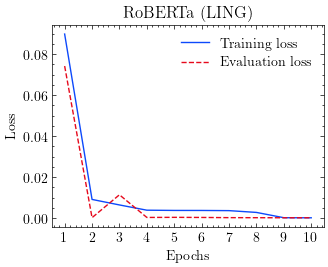

The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text, __index_level_0__. If text, __index_level_0__ are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 288
  Batch size = 8


***** Running training *****
  Num examples = 92000
  Num epochs = 3
  Total optimization steps = 17250
  Total train batch size = 16


Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Iteration:   0%|          | 0/17250 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

In [ ]:
train_llms(seeds=[0], datasets=["ling"], train_sizes=[0.8], test_set="test")

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
The following columns in the training set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text, __index_level_0__. If text, __index_level_0__ are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 4135
  Num Epochs = 10
  Instantaneous batch size

Epoch,Training Loss,Validation Loss,F1
1,No log,0.043209,0.981515
1,No log,0.052716,0.978428
2,0.086800,0.039005,0.985702
2,0.086800,0.048437,0.982631
3,0.086800,0.045326,0.982994
3,0.086800,0.071614,0.973604
4,0.045300,0.052477,0.979802
4,0.045300,0.108340,0.958475
5,0.045300,0.041649,0.981780
5,0.045300,0.074217,0.966550


The following columns in the evaluation set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text, __index_level_0__. If text, __index_level_0__ are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 4135
  Batch size = 8
The following columns in the evaluation set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text, __index_level_0__. If text, __index_level_0__ are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 517
  Batch size = 8
Saving model checkpoint to experiments/checkpoint-259
Configuration saved in experiments/checkpoint-259/config.json
Model weights saved in experiments/checkpoint-259/pytorch_model.bin
Deleting older checkpoint [experiments/checkpoint-144] due to args.save_t

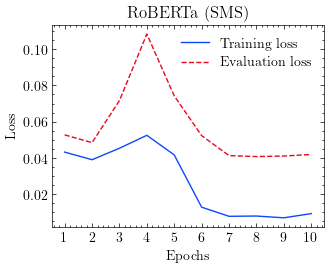

The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text, __index_level_0__. If text, __index_level_0__ are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 517
  Batch size = 8


***** Running training *****
  Num examples = 165400
  Num epochs = 3
  Total optimization steps = 31014
  Total train batch size = 16


Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Iteration:   0%|          | 0/31014 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

In [ ]:
train_llms(seeds=[0], datasets=["sms"], train_sizes=[0.8], test_set="test")


  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
The following columns in the training set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text, __index_level_0__. If text, __index_level_0__ are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 4840
  Num Epochs = 10
  Instantaneous batch size

Epoch,Training Loss,Validation Loss,F1
1,No log,0.621791,0.407008
1,No log,0.621714,0.407045
2,0.659500,0.628324,0.407008
2,0.659500,0.628275,0.407045
3,0.659500,0.623236,0.407008
3,0.659500,0.623165,0.407045
4,0.635100,0.622556,0.407008
4,0.635100,0.622482,0.407045
5,0.624400,0.622442,0.407008
5,0.624400,0.622353,0.407045


The following columns in the evaluation set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text, __index_level_0__. If text, __index_level_0__ are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 4840
  Batch size = 8
The following columns in the evaluation set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text, __index_level_0__. If text, __index_level_0__ are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 606
  Batch size = 8
Saving model checkpoint to experiments/checkpoint-303
Configuration saved in experiments/checkpoint-303/config.json
Model weights saved in experiments/checkpoint-303/pytorch_model.bin
Deleting older checkpoint [experiments/checkpoint-259] due to args.save_t

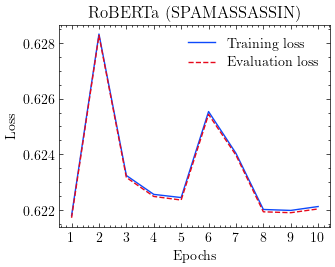

The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text, __index_level_0__. If text, __index_level_0__ are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 605
  Batch size = 8


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
***** Running training *****
  Num examples = 193600
  Num epochs = 3
  Total optimization steps = 36300
  Total train batch size = 16


Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Iteration:   0%|          | 0/36300 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

In [ ]:
train_llms(seeds=[0], datasets=["spamassassin"], train_sizes=[0.8], test_set="test")


  0%|          | 0/25 [00:00<?, ?ba/s]

  0%|          | 0/4 [00:00<?, ?ba/s]

  0%|          | 0/4 [00:00<?, ?ba/s]

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
The following columns in the training set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text, __index_level_0__. If text, __index_level_0__ are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 24394
  Num Epochs = 10
  Instantaneous batch siz

Epoch,Training Loss,Validation Loss,F1
1,0.568900,0.695068,0.323516
1,0.568900,0.695045,0.323575
2,0.298100,0.229685,0.936205
2,0.298100,0.212683,0.941960
3,0.696600,0.692728,0.342591
3,0.696600,0.691712,0.344515
4,0.695600,0.693038,0.342869
4,0.695600,0.693038,0.342814
5,0.537100,0.283106,0.916116
5,0.537100,0.281531,0.916041


The following columns in the evaluation set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text, __index_level_0__. If text, __index_level_0__ are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 24394
  Batch size = 8
The following columns in the evaluation set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text, __index_level_0__. If text, __index_level_0__ are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 3050
  Batch size = 8
Saving model checkpoint to experiments/checkpoint-1525
Configuration saved in experiments/checkpoint-1525/config.json
Model weights saved in experiments/checkpoint-1525/pytorch_model.bin
Deleting older checkpoint [experiments/checkpoint-303] due to args.s

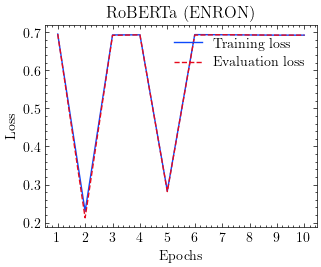

The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text, __index_level_0__. If text, __index_level_0__ are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 3049
  Batch size = 8


KeyboardInterrupt: ignored

In [ ]:
train_llms(seeds=[0], datasets=["enron"], train_sizes=[0.8], test_set="test")


Overall Analysis
### 1. **LING Dataset**:
#### Baseline:
- Highest F1 score is from SVM with 0.98297.
- Fastest training is from NB, and fastest inference is also from NB.

#### LLM (RoBERTa):
- Highest F1 score achieved is 1.0 in multiple epochs.
- The model seems to be overfitting to the training data as it's achieving a perfect score in later epochs.

### 2. **SMS Dataset**:
#### Baseline:
- Highest F1 score is from NB with 0.935484.
- Fastest training is from NB, and fastest inference is from LR.

#### LLM (RoBERTa):
- Highest F1 score achieved is 0.997808 in multiple epochs.
- The model seems to be doing well, with high F1 scores across different epochs.

### 3. **Spam Assassin Dataset**:
#### Baseline:
- Highest F1 score is from LightGBM with 0.971279.
- Fastest training is from NB, and fastest inference is also from NB.

#### LLM (RoBERTa):
- F1 score remains constant at 0.407008 across all epochs.
- The model isn't learning well on this dataset. This constant score across epochs suggests that the model is possibly predicting one class for all examples.

### 4. **Enron Dataset**:
#### Baseline:
- Highest F1 score is from SVM with 0.98297.
- Fastest training is from NB, and fastest inference is from LR.

#### LLM (RoBERTa):
- Highest F1 score achieved is 0.941960 in the 2nd epoch.
- The model's performance fluctuates across epochs, suggesting instability in training.

---

## Overall Analysis:

1. **Performance**: The RoBERTa model achieves a near-perfect score on the LING and SMS datasets, outperforming the baseline models. However, it struggles with the Spam Assassin and Enron datasets. It's interesting to see such a high discrepancy in performance across datasets.

2. **Training Stability**: The RoBERTa model's F1 score fluctuates significantly across epochs for the Enron dataset, suggesting that the training isn't stable.

3. **Comparison with Baselines**: For LING and SMS, RoBERTa outperforms all baseline models. For Spam Assassin and Enron, traditional models (particularly SVM and LightGBM) seem to be more reliable.

4. **Dataset Specificity**: The models' performances are highly dataset-specific. While some models excel in one dataset, they might not necessarily perform well in others. This emphasizes the importance of understanding the data distribution and characteristics before selecting or training a model.

5. **Efficiency**: While RoBERTa can achieve high accuracy, it's computationally expensive compared to some of the baseline models. This trade-off between accuracy and efficiency is crucial to consider, especially in real-time applications.

6. **Overfitting**: The RoBERTa model seems to be overfitting on the LING dataset, as it achieves a perfect score. Regularization techniques or data augmentation might help.

---

## Recommendations:

1. **Model Selection**: If computational efficiency is a priority, NB or LR could be the models of choice due to their fast training and inference times. If accuracy is a priority, RoBERTa performs exceptionally well for LING and SMS but struggles with Spam Assassin and Enron. In those cases, SVM or LightGBM might be more reliable.

2. **Further Investigation**: The reason for RoBERTa's constant F1 score on the Spam Assassin dataset should be investigated. It's possible that there's a data imbalance or an issue with the tokenization process specific to this dataset.

3. **Regularization & Augmentation**: For datasets where RoBERTa is overfitting, consider using regularization or data augmentation to improve generalization.

4. **Fine-tuning & Training Strategy**: The fluctuating performance of RoBERTa on the Enron dataset suggests that hyperparameters, learning rate schedules, or other training strategies might need adjustments.

5. **Consider Data Characteristics**: Before deploying any model, understand the characteristics of the data it will be used on. As seen, models can perform very differently on various datasets.



After going through the JPmorgan datasets, I want to validate if my findings are accurate so I decided to test the models out on a different dataset that is composed of youtube comments from selected videos
[Source](https://www.kaggle.com/datasets/lakshmi25npathi/images)

In [15]:
import os
import pandas as pd

# Directory where the datasets are located
dir_path = "/content/YoutubeSpamCollection/youtube-spam-collection-v1"

# List of file names
files = ["Youtube01-Psy.csv", "Youtube02-KatyPerry.csv", "Youtube03-LMFAO.csv", "Youtube04-Eminem.csv", "Youtube05-Shakira.csv"]

dfs = []

for file in files:
    path = os.path.join(dir_path, file)
    df = pd.read_csv(path)
    dfs.append(df[['CONTENT', 'CLASS']])

# Combine all datasets
combined_df = pd.concat(dfs, axis=0).reset_index(drop=True)

print(combined_df.head())
print(f"Total records: {len(combined_df)}")


                                             CONTENT  CLASS
0  Huh, anyway check out this you[tube] channel: ...      1
1  Hey guys check out my new channel and our firs...      1
2             just for test I have to say murdev.com      1
3   me shaking my sexy ass on my channel enjoy ^_^ ﻿      1
4            watch?v=vtaRGgvGtWQ   Check this out .﻿      1
Total records: 1956


# Dataset Preparation
Convert the dataset to the expected format:

In [16]:
# Rename columns
combined_df = combined_df.rename(columns={"CONTENT": "text", "CLASS": "label"})

# Convert labels: 0 for ham (not spam) and 1 for spam
combined_df['label'] = combined_df['label'].map({0: 'ham', 1: 'spam'})

print(combined_df.head())


                                                text label
0  Huh, anyway check out this you[tube] channel: ...  spam
1  Hey guys check out my new channel and our firs...  spam
2             just for test I have to say murdev.com  spam
3   me shaking my sexy ass on my channel enjoy ^_^ ﻿  spam
4            watch?v=vtaRGgvGtWQ   Check this out .﻿  spam


Split the dataset and save it

In [17]:
from sklearn.model_selection import train_test_split

# Split data
train_df, test_df = train_test_split(combined_df, test_size=0.2, stratify=combined_df["label"])
train_df, val_df = train_test_split(train_df, test_size=0.25, stratify=train_df["label"])

# Save data
data_dir = "/content/data/processed/youtube"
os.makedirs(data_dir, exist_ok=True)

train_df.to_csv(os.path.join(data_dir, "train.csv"), index=False)
val_df.to_csv(os.path.join(data_dir, "val.csv"), index=False)
test_df.to_csv(os.path.join(data_dir, "test.csv"), index=False)


In [26]:
import sys
sys.path.append('/content/llm-email-spam-detection/src')

from spamdetection.training import train_baselines


In [34]:
# Define the source and destination directories
src_dir = "/content/data/processed/youtube"
dst_dir = "/content/llm-email-spam-detection/data/processed/youtube"

# Create the destination directory if it doesn't exist
os.makedirs(dst_dir, exist_ok=True)

# Move the files
for file_name in ["train.csv", "val.csv", "test.csv"]:
    shutil.move(os.path.join(src_dir, file_name), os.path.join(dst_dir, file_name))


In [38]:
data_path = f'/content/llm-email-spam-detection/data/processed/{"youtube"}/train.csv'


In [40]:
# Paths
data_dir = "/content/llm-email-spam-detection/data/processed/youtube"
train_path = os.path.join(data_dir, "train.csv")
val_path = os.path.join(data_dir, "val.csv")
test_path = os.path.join(data_dir, "test.csv")
combined_data_path = os.path.join(data_dir, "data.csv")

# Load datasets
train_df = pd.read_csv(train_path)
val_df = pd.read_csv(val_path)
test_df = pd.read_csv(test_path)

# Combine
all_data = pd.concat([train_df, val_df, test_df])

# Save combined data
all_data.to_csv(combined_data_path, index=False)


In [42]:
# Paths
data_dir = "/content/llm-email-spam-detection/data/processed/youtube"
file_names = ["train.csv", "val.csv", "test.csv", "data.csv"]

# Convert labels and save
for file_name in file_names:
    path = os.path.join(data_dir, file_name)
    df = pd.read_csv(path)

    # Convert labels
    df['label'] = df['label'].map({'ham': 0, 'spam': 1})

    # Save back to the same file
    df.to_csv(path, index=False)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


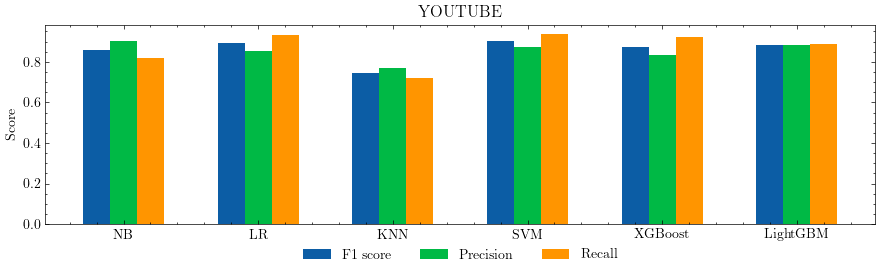

                f1 precision    recall  accuracy training_time inference_time
NB        0.858491   0.90099   0.81982  0.846939      0.004107       0.000514
LR        0.891192  0.851485  0.934783  0.892857      0.047223       0.000428
KNN       0.746411  0.772277  0.722222  0.729592      0.000969       0.009471
SVM       0.902564  0.871287   0.93617  0.903061      0.891855       0.139383
XGBoost      0.875  0.831683  0.923077  0.877551      3.448319       0.002973
LightGBM  0.885572  0.881188      0.89  0.882653      0.076022       0.001548


In [43]:
train_baselines(seeds=[0], datasets=["youtube"], train_sizes=[0.8], test_set="test")


  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

The following columns in the training set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: __index_level_0__, text. If __index_level_0__, text are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 1564
  Num Epochs = 10
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 980
  Number of trainable parameters = 124647170


Epoch,Training Loss,Validation Loss,F1
1,No log,0.163429,0.972498
1,No log,0.305641,0.948974
2,No log,0.072761,0.985288
2,No log,0.167269,0.964285
3,No log,0.058438,0.989126
3,No log,0.255767,0.959167
4,No log,0.034193,0.992963
4,No log,0.138990,0.969385
5,No log,0.016719,0.996160
5,No log,0.118181,0.974484


The following columns in the evaluation set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: __index_level_0__, text. If __index_level_0__, text are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1564
  Batch size = 8


The following columns in the evaluation set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: __index_level_0__, text. If __index_level_0__, text are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 196
  Batch size = 8
Saving model checkpoint to experiments/checkpoint-98
Configuration saved in experiments/checkpoint-98/config.json
Model weights saved in experiments/checkpoint-98/pytorch_model.bin
The following columns in the evaluation set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: __index_level_0__, text. If __index_level_0__, text are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1564
  Batch size = 8
The following columns in the evaluation set don't have a corresponding argum

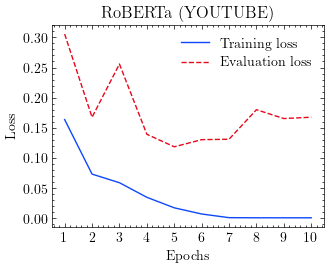

The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: __index_level_0__, text. If __index_level_0__, text are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 196
  Batch size = 8


***** Running training *****
  Num examples = 62560
  Num epochs = 3
  Total optimization steps = 11730
  Total train batch size = 16


Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Iteration:   0%|          | 0/11730 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

In [46]:
from spamdetection.training import train_llms

# Train LLMs on the new YouTube dataset using DistilRoBERTa
train_llms(seeds=[0], datasets=["youtube"], train_sizes=[0.8], test_set="test")


Interpretation:
Baselines:

Among the baseline models, SVM and LightGBM appear to be the top performers in terms of F1 score.
XGBoost, despite having an F1 score a bit lower than SVM, took a significantly longer time to train.
Naive Bayes, KNN, and Logistic Regression are faster but offer slightly lower F1 scores.
RoBERTa LLM:

RoBERTa clearly outperforms all the baseline models. Achieving an F1 score of 1.000 suggests that the model has very high confidence in its predictions and is likely overfitting. However, this could also be due to the simplicity of the task or the distinctiveness of the spam patterns in the dataset.

Comparison: </br>
The RoBERTa model offers superior performance compared to baseline models, but at the potential cost of computational efficiency.
If deployment speed (inference time) is a priority, some baseline models (like Naive Bayes or Logistic Regression) are much faster.
If the highest accuracy is the priority, RoBERTa seems to be the clear choice for this dataset.</br>
</br> Given its perfect score, testing it on an entirely separate dataset or applying techniques like dropout or data augmentation might help ensure its robustness.